In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [3]:
# importing dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


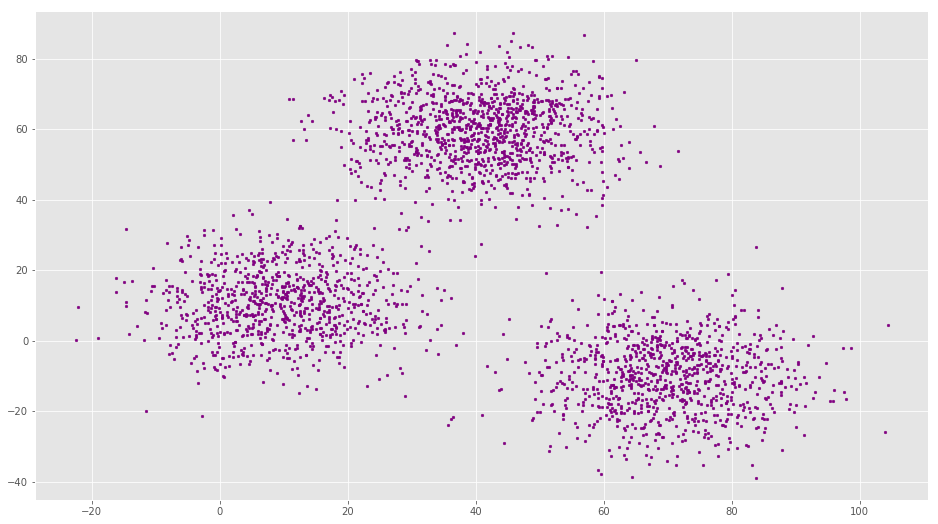

In [7]:
# getting the values nad plotiing it
f1 = data['V1'].values
f2 = data['V2'].values
# print(zip(f1,f2))
X =  np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c='purple',s=7)

In [8]:
# Ecuclidian Distance calculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [10]:
# number of clusters
k=3
# x cordinates of random centeroids
C_x = np.random.randint(0,np.max(X)-20,size=k)
# Y cordinates of random centeroids
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
print(C)


[[ 54.  29.]
 [ 71.  58.]
 [ 81.  63.]]


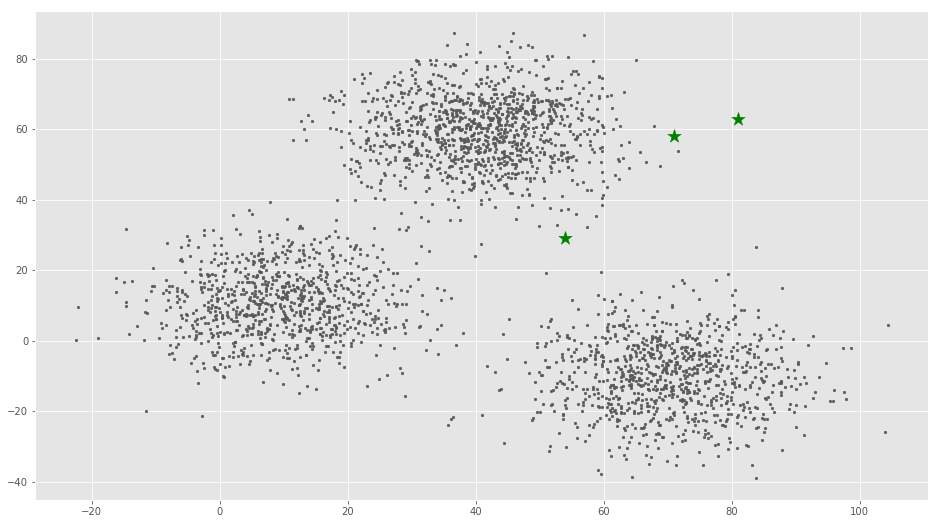

In [11]:
plt.scatter(f1,f2,c='#595959',s=7)
plt.scatter(C_x,C_y,marker='*',s=200,c='g')

In [13]:
# To store the values of centeriod when it updates
C_old   = np.zeros(C.shape)
# cluster labels(0,1,2)
clusters = np.zeros(len(X))
# error func, - Distance between new centeroids and old centeroids
error = dist(C,C_old,None)
# Loop will run till the error becomes zero
for i in range(len(X)):
    distances = dist(X[i],C)
    cluster = np.argmin(distances)
    clusters[i] = cluster
# storing the old centeroid values
C_old = deepcopy(C)
# Finding the new centeroids by taking the average values
for i in range(1):
    points = [X[j] for j in range(len(X)) if clusters[j] ==i]
    C[i] = np.mean(points,axis=0)
error = dist(C,C_old,None)

IndexError: too many indices for array

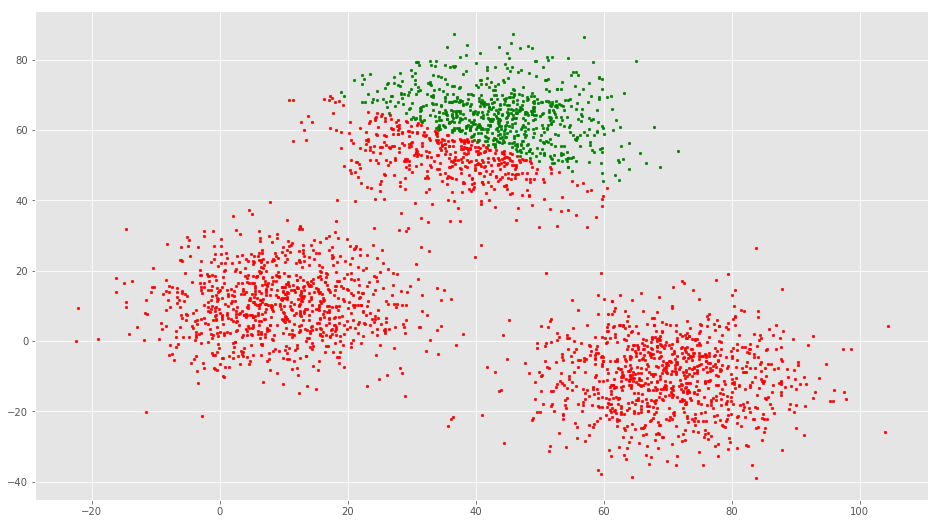

In [19]:
colors=['r','g','b','y','c','m']
fig,ax=plt.subplots()
for i in range(k):
    points=np.array([X[j] for j in range(len(X)) if clusters[j]==i])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(C[:,0],C[:,1],marker='*',s=200,c='#050505')